<a href="https://colab.research.google.com/github/davidkorea/google_colaboratory/blob/master/CH02_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
def createdataset():
  group = np.array([[1, 1.1],[1,1],[0,0],[0, 1.1]])
  labels = ['A','A','B','B']
  return group, labels

In [0]:
group, labels = createdataset()

In [5]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 1.1]])

In [6]:
labels

['A', 'A', 'B', 'B']

0 1.0 1.1 A
1 1.0 1.0 A
2 0.0 0.0 B
3 0.0 1.1 B


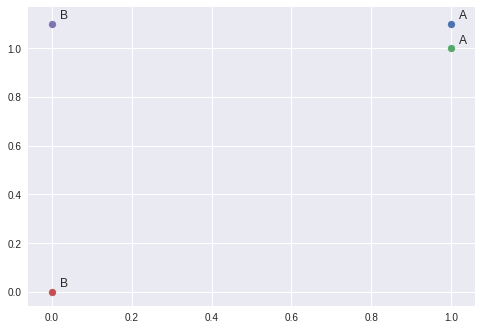

In [22]:
for i in range(group.shape[0]):
  print(i, group[i][0],group[i][1],labels[i])
  plt.scatter(group[i][0],group[i][1])
  plt.text(group[i][0]+0.02,group[i][1]+0.02,labels[i])

In [56]:
df = pd.DataFrame(group, columns=['x','y'])
df

,x,y
0,1.0,1.1
1,1.0,1.0
2,0.0,0.0
3,0.0,1.1


In [0]:
# df = pd.concat((df,pd.Series(labels)),axis=1)

In [58]:
df['label'] = pd.Series(labels)
df

,x,y,label
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,1.1,B


In [62]:
df['cate'] = df['label'].apply(lambda x:0 if x=='A' else 1)
df

,x,y,label,cate
0,1.0,1.1,A,0
1,1.0,1.0,A,0
2,0.0,0.0,B,1
3,0.0,1.1,B,1


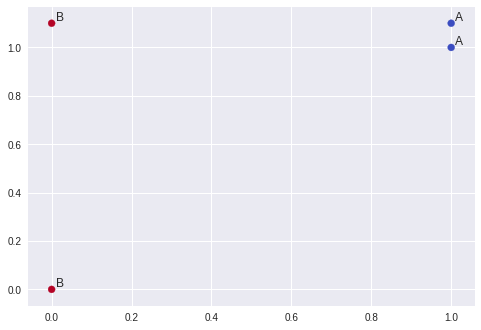

In [68]:
plt.scatter(df.x,df.y,c=df.cate, cmap='coolwarm') # str cannot be used as 'c' value
for i in range(df.shape[0]):
  plt.text(df.x[i]+0.01,df.y[i]+0.01,df.label[i])

## 2-1 KNN Algorithm

In [136]:
def classify0(inX, dataset, labels, k):
  dataset_row = dataset.shape[0]
  diff = np.tile(inX, (dataset_row,1)) - dataset # only copy row, cuz input vector has same dim as dataset
  # each sample in dataset will - input vector, so copy input as the shape of dataset  
  sqdiff = diff**2
  sum_sqdiff = sqdiff.sum(axis=1) # sqdiff.sum() add all elements in matrix
  distance = sum_sqdiff**0.5
  sort_distance_idx = distance.argsort() # can not use sorted(distance) 
  vote_label = {}
  for i in range(k):
    label = labels[ sort_distance_idx[i] ]    
    vote_label[label] = vote_label.get(label,0)+1
#     print(label)
  sort_vote_label = sorted(vote_label.items(), key=lambda x : x[1], reverse=True)
#   print(vote_label,sort_vote_label)
#   print(sqdiff, '\n', sum_sqdiff, '\n',sqdiff.sum(), '\n',distance)
#   print(sort_distance_idx,)

  return sort_vote_label[0][0]


classify0([0,0], group, labels, 3)

'B'

- **np.tile()**

In [135]:
np.tile(['a','b'],(2,2))

array([['a', 'b', 'a', 'b'],
       ['a', 'b', 'a', 'b']], dtype='<U1')

- **dict.get()**

In [0]:
a = {'x':1,'y':2}

In [119]:
a.get('z',0)

0

In [122]:
a['z'] = a.get('z',0)
a

{'x': 1, 'y': 2, 'z': 0}

In [1]:
!pip install pydrive

    100% |████████████████████████████████| 993kB 19.5MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
!ls

adc.json  sample_data


In [5]:
!pwd

/content


In [0]:
!cd ..

In [7]:
!pwd

/content


In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

In [11]:
for file in file_list:
  print(file)
  print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))

GoogleDriveFile({'kind': 'drive#file', 'id': '1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'etag': '"omwGuTP8OdxhZkubyp-j43cFdJQ/MTU0MDkwODI5MTE0MA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'alternateLink': 'https://drive.google.com/drive/folders/1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'embedLink': 'https://drive.google.com/embeddedfolderview?id=1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder', 'title': 'ML_inAction', 'mimeType': 'application/vnd.google-apps.folder', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2018-10-30T14:04:51.140Z', 'modifiedDate': '2018-10-30T14:04:51.140Z', 'modifiedByMeDate': '2018-10-30T14:04:51.140Z', 'lastViewedByMeDate': '2018-11-03T14:11:40.046Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'version': '7', 'par

In [22]:
# 1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_
ML_inAction_list = drive.ListFile({'q': "'1UW1Jn-a0w4cDefsupur_7tbiT1HTlUy_' in parents and trashed=false"}).GetList()
for file in ML_inAction_list:
  print('\n title: %s,\n id: %s,\n mimeType: %s \n' % (file['title'], file['id'], file["mimeType"]))


 title: CH02_KNN.ipynb,
 id: 15Vo7Pq3DswVu8wypdtcF6DD30-iPd-KH,
 mimeType: application/vnd.google.colaboratory 


 title: datingTestSet2.txt,
 id: 17B8sLs13NajyXqUsFsS_R2x8vy6AJtHd,
 mimeType: text/plain 



In [25]:
file = drive.CreateFile({'id': "17B8sLs13NajyXqUsFsS_R2x8vy6AJtHd"})
file.GetContentFile('datingTestSet2.txt','text/plain') 
with open('datingTestSet2.txt') as f:
  print(f)
  print(f.readlines())


<_io.TextIOWrapper name='datingTestSet2.txt' mode='r' encoding='UTF-8'>
['40920\t8.326976\t0.953952\t3\n', '14488\t7.153469\t1.673904\t2\n', '26052\t1.441871\t0.805124\t1\n', '75136\t13.147394\t0.428964\t1\n', '38344\t1.669788\t0.134296\t1\n', '72993\t10.141740\t1.032955\t1\n', '35948\t6.830792\t1.213192\t3\n', '42666\t13.276369\t0.543880\t3\n', '67497\t8.631577\t0.749278\t1\n', '35483\t12.273169\t1.508053\t3\n', '50242\t3.723498\t0.831917\t1\n', '63275\t8.385879\t1.669485\t1\n', '5569\t4.875435\t0.728658\t2\n', '51052\t4.680098\t0.625224\t1\n', '77372\t15.299570\t0.331351\t1\n', '43673\t1.889461\t0.191283\t1\n', '61364\t7.516754\t1.269164\t1\n', '69673\t14.239195\t0.261333\t1\n', '15669\t0.000000\t1.250185\t2\n', '28488\t10.528555\t1.304844\t3\n', '6487\t3.540265\t0.822483\t2\n', '37708\t2.991551\t0.833920\t1\n', '22620\t5.297865\t0.638306\t2\n', '28782\t6.593803\t0.187108\t3\n', '19739\t2.816760\t1.686209\t2\n', '36788\t12.458258\t0.649617\t3\n', '5741\t0.000000\t1.656418\t2\n', '285